## Setup

### Load packages


In [90]:
library(ggplot2)
library(dplyr)
library(ggpubr)
library(gridExtra)
library(scales)

### Load data

Make sure your data and R Markdown files are in the same directory. When loaded
your data file will be called `brfss2013`. Delete this note when before you submit 
your work. 


In [2]:
load("brfss2013.RData")

* * *

## Part 1: Data

The BRFSS data contains preventive health practices and risk behaviors collected from non-institutionalized adult population, aged 18 years or older via telephonics interviews.
It is a collabortaive effort between all of the states in the United States (US) and the Centers for Disease Control and Prevention (CDC).

### Sample

1. The states use a standardized core questionnaire, optional modules, and state-added questions.
2. The survey is conducted using Random Digit Dialing (RDD) techniques on both landlines and cell phones.

### Inference

1. It is an observational study, not experimental, since we are monitoring what occurs, while experiments require the primary explanatory variable in a study be assigned for each subject by the researchers.
2. It is a randomized study using Stratified Sampling. (Point #2 above)

### Generalizability

1. The study is generalizable to all non-institutionalized adults equal to or above 18 years in the US.

### Causality

1. Observational nature of the study makes the results non-causal, i.e., we can show correlation or association only.
2. Labeling variables as explanatory and response does not guarantee the relationship between the two is actually causal, even if there is an association identified between the two variables.


* * *

## Part 2: Research questions

**Research quesion 1:**
How does sleep time affect Physical and Mental Health

- physhlth: Number Of Days Physical Health Not Good
- menthlth: Number Of Days Mental Health Not Good
- sleptim1: How Much Time Do You Sleep

Does lower sleep time indicate poor health?
We will check the correlation between Sleep Time and Physical & Mental Health of an individual.

**Research quesion 2:**
How does Education level associate to Income and general health

- educa: Education Level
- income2: Income Level
- genhlth: General Health

We would expect a higher education to yield a higher income, i.e. a positive correlation.
Are richer people more healthy?

**Research quesion 3:**
Does better general health correlate to longer Length Of Time Since Last Routine Checkup 

- genhlth: General Health
- checkup1: Length Of Time Since Last Routine Checkup


* * *

## Part 3: Exploratory data analysis

NOTE: Insert code chunks as needed by clicking on the "Insert a new code chunk" 
button (green button with orange arrow) above. Make sure that your code is visible
in the project you submit. Delete this note when before you submit your work.

**Research quesion 1:**


#### How does sleep time affect Physical and Mental Health

- physhlth: Number Of Days Physical Health Not Good
- menthlth: Number Of Days Mental Health Not Good
- sleptim1: How Much Time Do You Sleep

Does lower sleep time indicate poor health?
We will check the correlation between Sleep Time and Health of an individual.


In [5]:
rq1_select <- brfss2013 %>%
  select('physical' = physhlth, 'mental' = menthlth, 'sleep' = sleptim1)

We want to work with non NA values. Hence, we remove the NAs. Note that none of the statistical summaries will be affected by this ommision.

In [6]:
rq1_omit <- rq1_select %>% na.omit()

In [7]:
#Checking if all NA's have been omitted
sum(is.na(rq1_omit))

[1] 0

In [8]:
summary(rq1_omit)

    physical          mental             sleep        
 Min.   : 0.000   Min.   :   0.000   Min.   :  0.000  
 1st Qu.: 0.000   1st Qu.:   0.000   1st Qu.:  6.000  
 Median : 0.000   Median :   0.000   Median :  7.000  
 Mean   : 4.247   Mean   :   3.339   Mean   :  7.052  
 3rd Qu.: 3.000   3rd Qu.:   2.000   3rd Qu.:  8.000  
 Max.   :60.000   Max.   :5000.000   Max.   :450.000  

The above summary shows that there are anomalous rows in the dataframe wherein the maximum number of days in Physical and Mental exceeds 30, and/or sleep exceed 24 hours. Thus-

- We need to remove values breaching 30 days threshold in Physical and Mental variables as the data collection time horizon was set at 30 days.
- We need to limit maximum sleep to a realistic 22 hours. Hence we filter out >22 hour observations (there are only 24 hours in a day)

In [9]:
rq1 <- rq1_omit %>%
 filter(physical <= 30 & mental <= 30 & sleep <= 22)

In [10]:
summary(rq1)

    physical          mental           sleep      
 Min.   : 0.000   Min.   : 0.000   Min.   : 1.00  
 1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.: 6.00  
 Median : 0.000   Median : 0.000   Median : 7.00  
 Mean   : 4.247   Mean   : 3.327   Mean   : 7.05  
 3rd Qu.: 3.000   3rd Qu.: 2.000   3rd Qu.: 8.00  
 Max.   :30.000   Max.   :30.000   Max.   :22.00  

The new summary shows the data are within expected thresholds. Now we move on to regression of physical and mental health against sleep time to show correlation

In [11]:
rq1_physical <- rq1 %>%
 group_by(sleep) %>%
 summarise_at(vars(physical), list(physical_health_mean = mean))

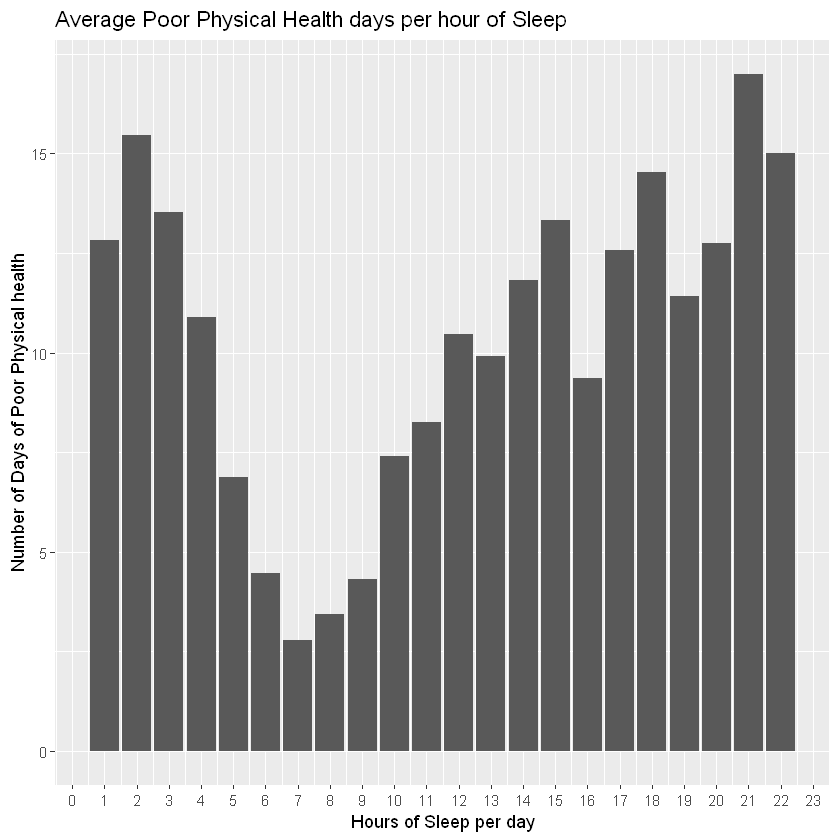

In [12]:
ggplot(rq1_physical, aes(x=sleep, y=physical_health_mean))+geom_col()+scale_x_continuous(breaks = round(seq(0, 23, by = 1),1))+
 labs(x='Hours of Sleep per day', y='Number of Days of Poor Physical health', title='Average Poor Physical Health days per hour of Sleep')

This plot yields a very interesting fact about the relationship between sleep cycle and the physical health of the sample.

### Observation
- We note that as the number of hours of sleep increases from 1 to 7, there is an improvement in physical health (indicated by the decrease in avg. numeber of poor physical health days reported)
- Further, as the sleep time increases from 7 to 22 hours per day, we see more average poor physical health days in the month (past 30 days).

### Inference
- 6-9 hours of sleep yields the best average physical health among the adults sampled.
- This finding conforms to the medical recommendation of 8 hours of sleep per day.

In [13]:
rq1_mental <- rq1 %>%
 group_by(sleep) %>%
 summarise_at(vars(mental), list(mental_health_mean = mean))

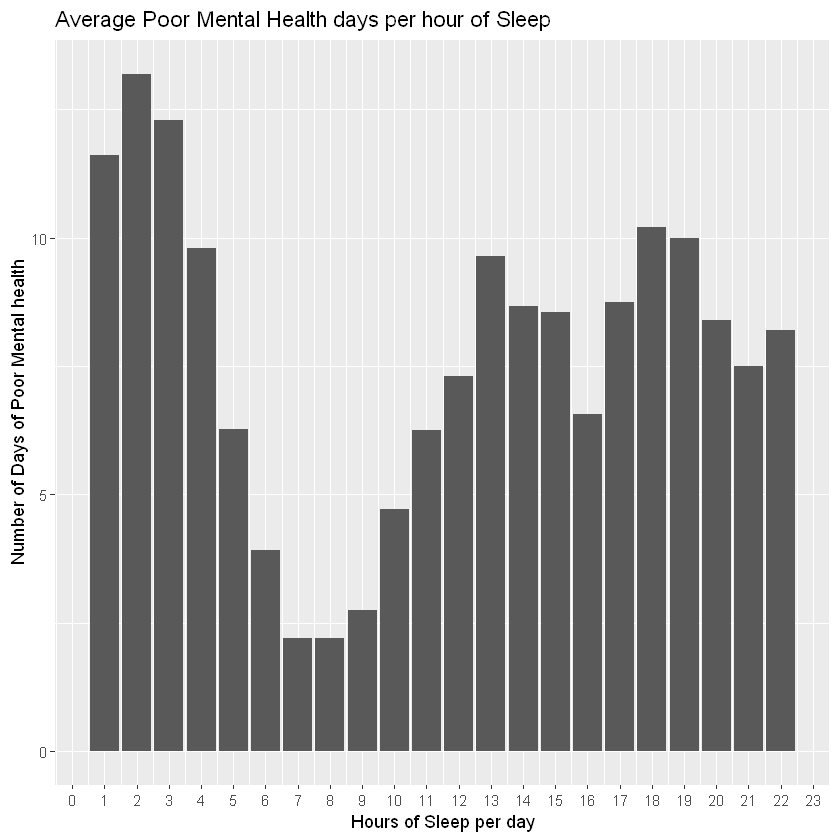

In [14]:
ggplot(rq1_mental, aes(x=sleep, y=mental_health_mean))+geom_col()+scale_x_continuous(breaks = round(seq(0, 23, by = 1),1))+
 labs(x='Hours of Sleep per day', y='Number of Days of Poor Mental health', title='Average Poor Mental Health days per hour of Sleep')

- The Mental Health shows almost identical behaviour to the Physical Health discussion held above. Please refer to the detailed note above to match observations and inference.
- An additional observation here is that <4 hours of sleep yields higher number of poor mental health days as compared to sleeping >11 hours.

**Research quesion 2:**



#### How does Education level associate to Income and general health

- educa: Education Level
- income2: Income Level
- genhlth: General Health

We would expect a higher education to yield a higher income, i.e. a positive correlation.
Are richer people more healthy?

#### Data Selection

In [26]:
rq2_select <- brfss2013 %>%
  select('education' = educa, 'income' = income2, 'health' = genhlth)

In [27]:
summary(rq2_select)

                                                        education     
 Never attended school or only kindergarten                  :   677  
 Grades 1 through 8 (Elementary)                             : 13395  
 Grades 9 though 11 (Some high school)                       : 28141  
 Grade 12 or GED (High school graduate)                      :142971  
 College 1 year to 3 years (Some college or technical school):134197  
 College 4 years or more (College graduate)                  :170120  
 NA's                                                        :  2274  
               income             health      
 $75,000 or more  :115902   Excellent: 85482  
 Less than $75,000: 65231   Very good:159076  
 Less than $50,000: 61509   Good     :150555  
 Less than $35,000: 48867   Fair     : 66726  
 Less than $25,000: 41732   Poor     : 27951  
 (Other)          : 87108   NA's     :  1985  
 NA's             : 71426                     

#### Data Cleanup
We want to work with non NA values. Hence, we remove the NAs. Note that none of the statistical summaries will be affected by this ommision.

In [28]:
rq2_omit <- rq2_select %>% na.omit()

In [29]:
#Checking if all NA's have been omitted
sum(is.na(rq2_omit))

[1] 0

In [32]:
summary(rq2_omit)

                                                        education     
 Never attended school or only kindergarten                  :   443  
 Grades 1 through 8 (Elementary)                             : 10152  
 Grades 9 though 11 (Some high school)                       : 22359  
 Grade 12 or GED (High school graduate)                      :118227  
 College 1 year to 3 years (Some college or technical school):115668  
 College 4 years or more (College graduate)                  :151557  
                                                                      
               income             health      
 $75,000 or more  :115570   Excellent: 74177  
 Less than $75,000: 65058   Very good:138126  
 Less than $50,000: 61266   Good     :127531  
 Less than $35,000: 48617   Fair     : 55514  
 Less than $25,000: 41491   Poor     : 23058  
 Less than $20,000: 34628                     
 (Other)          : 51776                     

The above summmary shows that all three variables are categorical, can seen in the "value labels". As per the code-book of this data set these are all factor data types which can be sorted based on their "value" which are inteegers starting at numeric "1".

Now we will begin to visualize the association between education and income/health.

#### Exploration

In [34]:
rq2_education <- rq2_omit %>%
 count(income, education) %>%
 group_by(education) %>%
 mutate(p = n/sum(n))

head(rq2_education, 5)

income,education,n,p
<fct>,<fct>,<int>,<dbl>
"Less than $10,000",Never attended school or only kindergarten,117,0.26410835
"Less than $10,000",Grades 1 through 8 (Elementary),2565,0.25265957
"Less than $10,000",Grades 9 though 11 (Some high school),4232,0.18927501
"Less than $10,000",Grade 12 or GED (High school graduate),9357,0.07914436
"Less than $10,000",College 1 year to 3 years (Some college or technical school),6070,0.05247778


Warning message in pal_name(palette, type):
"Unknown palette Set4"


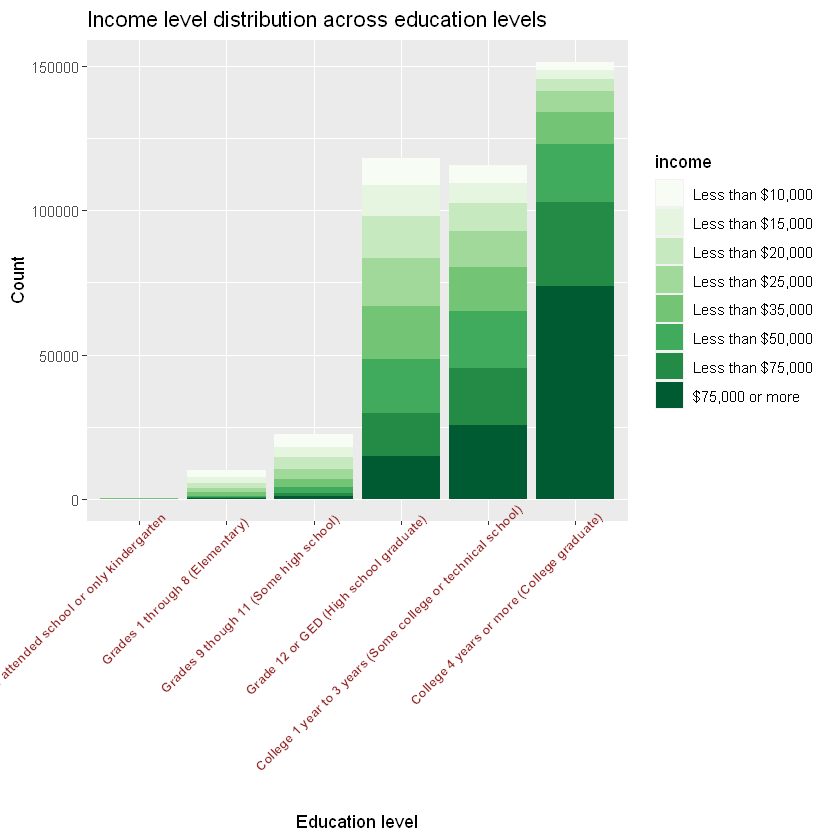

In [53]:
ggplot(rq2_education, aes(education, n, fill=income))+
 geom_col() +
 labs(x='Education level', y='Count', title='Income level distribution across education levels')+
 theme(axis.text.x = element_text(face = "bold", color = "#993333",size=8,angle = 45,vjust = 1, hjust=0.9))+
 scale_fill_brewer(palette="Set4")

- Looking at this plot we can see the three most common levels of education Grade 12 or GED, College 1-3 years, and College 4 years or more.
- There are very few adults in our sample who "Never attended school" = 443

Now lets plot the same curve based on proportions rather than number to get a clearer picture of the distribution.

Warning message in pal_name(palette, type):
"Unknown palette Set10"


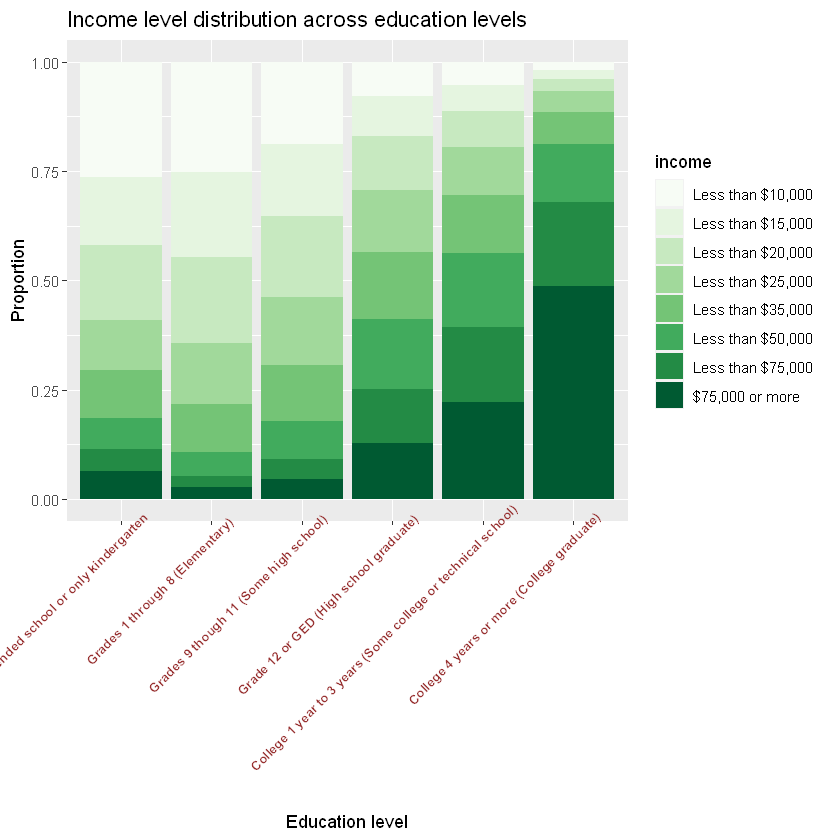

In [68]:
ggplot(rq2_education, aes(education, p, fill=income))+
 geom_col() +
 labs(x='Education level', y='Proportion', title='Income level distribution across education levels')+
 theme(axis.text.x = element_text(face = "bold", color = "#993333",size=8,angle = 45,vjust = 1, hjust=0.9))+
 scale_fill_brewer(palette="Set10")

We do see a positive association, that is, higher levels of study leading to better incomes. While this is more or less expected, it is re-assuring to see that the data conforms to this line of thought.

Next we move on to the see if the Health of an individual is correlated to his/her education level.

In [64]:
rq2_health <- rq2_omit %>%
 count(health, education) %>%
 group_by(education) %>%
 mutate(p = n/sum(n))

head(rq2_health, 5)

health,education,n,p
<fct>,<fct>,<int>,<dbl>
Excellent,Never attended school or only kindergarten,43,0.09706546
Excellent,Grades 1 through 8 (Elementary),716,0.07052797
Excellent,Grades 9 though 11 (Some high school),1806,0.08077284
Excellent,Grade 12 or GED (High school graduate),14671,0.12409179
Excellent,College 1 year to 3 years (Some college or technical school),18541,0.16029498


Warning message in pal_name(palette, type):
"Unknown palette Set6"


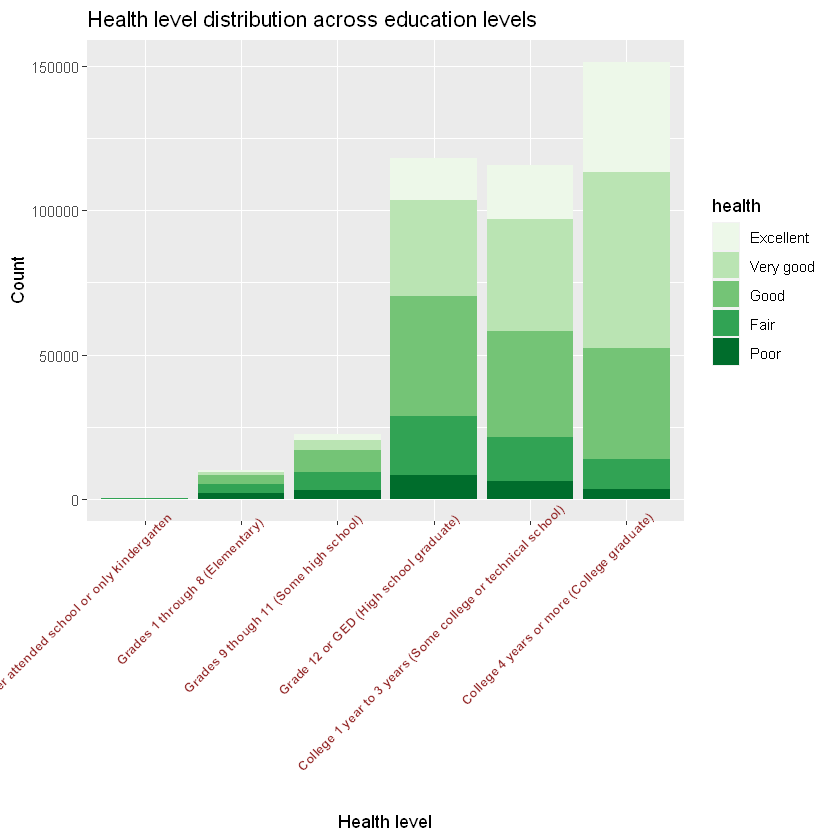

In [67]:
ggplot(rq2_health, aes(education, n, fill=health))+
 geom_col() +
 labs(x='Health level', y='Count', title='Health level distribution across education levels')+
 theme(axis.text.x = element_text(face = "bold", color = "#993333",size=8,angle = 45,vjust = 1, hjust=0.9))+
 scale_fill_brewer(palette="Set6")

- Looking at this plot we can see the three most common levels of education Grade 12 or GED, College 1-3 years, and College 4 years or more.
- We would need to look at exact proportions of the distribution to determine any associativity.

Warning message in pal_name(palette, type):
"Unknown palette Set6"


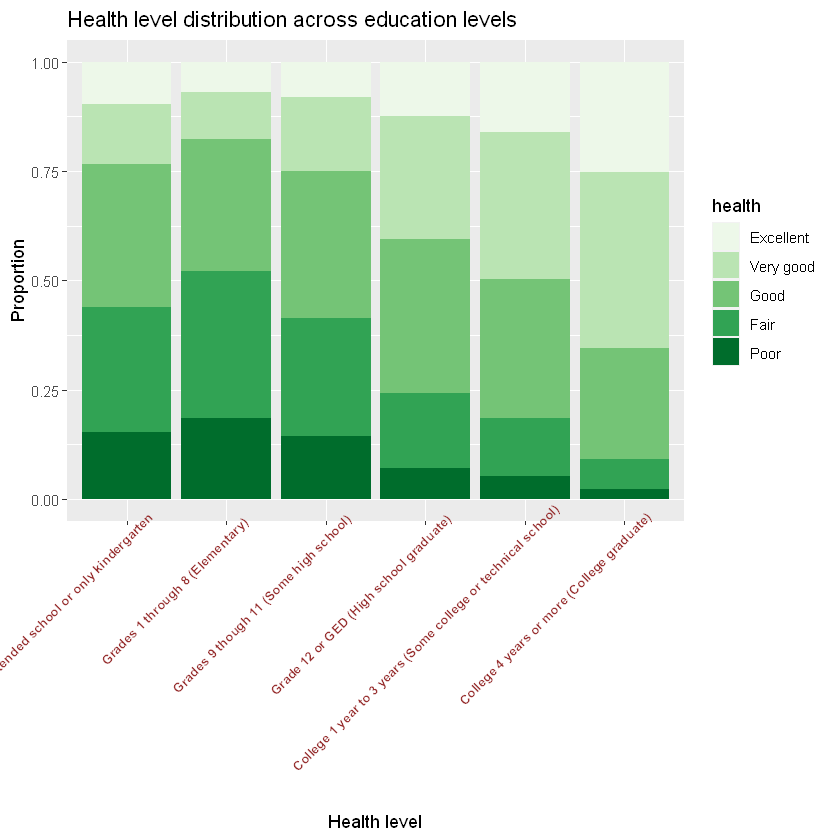

In [69]:
ggplot(rq2_health, aes(education, p, fill=health))+
 geom_col() +
 labs(x='Health level', y='Proportion', title='Health level distribution across education levels')+
 theme(axis.text.x = element_text(face = "bold", color = "#993333",size=8,angle = 45,vjust = 1, hjust=0.9))+
 scale_fill_brewer(palette="Set6")

#### Wow!
- Note how the proportion of "Excellent" health adults increases as the education level increases.
- Furthermore, the proportion of people with "Poor" health increases as the education level decreases.
- Infact, even the percentage (%) of people in "Fair" health decreases with increase in education level.
- Hence we may present a blanket statement that better education is positively correlated to the health level of an adult of the said demograhics.
- While our intial thinking behind undertaking this exploration is proven true, further statistical analysis is beyond the scope of this EDA (Exploratory Data Analysis).

**Research quesion 3:**



Does better general health correlate to longer Length Of Time Since Last Routine Checkup 

- genhlth: General Health
- checkup1: Length Of Time Since Last Routine Checkup

In [79]:
rq3_select <- brfss2013 %>%
  select('health' = genhlth, 'checkup' = checkup1)

In [80]:
summary(rq3_select)

       health                      checkup      
 Excellent: 85482   Within past year   :356228  
 Very good:159076   Within past 2 years: 57298  
 Good     :150555   Within past 5 years: 33674  
 Fair     : 66726   5 or more years ago: 33748  
 Poor     : 27951   Never              :  4522  
 NA's     :  1985   NA's               :  6305  

#### Data Cleanup
We want to work with non NA values. Hence, we remove the NAs. Note that none of the statistical summaries will be affected by this ommision.

In [81]:
rq3_omit <- rq3_select %>% na.omit()

In [82]:
#Checking if all NA's have been omitted
sum(is.na(rq3_omit))

[1] 0

In [83]:
summary(rq3_omit)

       health                      checkup      
 Excellent: 84586   Within past year   :354841  
 Very good:157574   Within past 2 years: 57132  
 Good     :148584   Within past 5 years: 33547  
 Fair     : 65619   5 or more years ago: 33594  
 Poor     : 27233   Never              :  4482  

The above summmary shows that both the variables are categorical, can seen in the "value labels". As per the code-book of this data set these are all factor data types which can be sorted based on their "value" which are inteegers starting at numeric "1".

Now we will begin to visualize the association between Health and Checkup lag time.

#### Exploration

In [84]:
rq3_checkup <- rq3_omit %>%
 count(health, checkup) %>%
 group_by(health) %>%
 mutate(p = n/sum(n))

head(rq3_checkup, 5)

health,checkup,n,p
<fct>,<fct>,<int>,<dbl>
Excellent,Within past year,58384,0.690232426
Excellent,Within past 2 years,11832,0.139881304
Excellent,Within past 5 years,6874,0.081266403
Excellent,5 or more years ago,6702,0.079232970
Excellent,Never,794,0.009386896


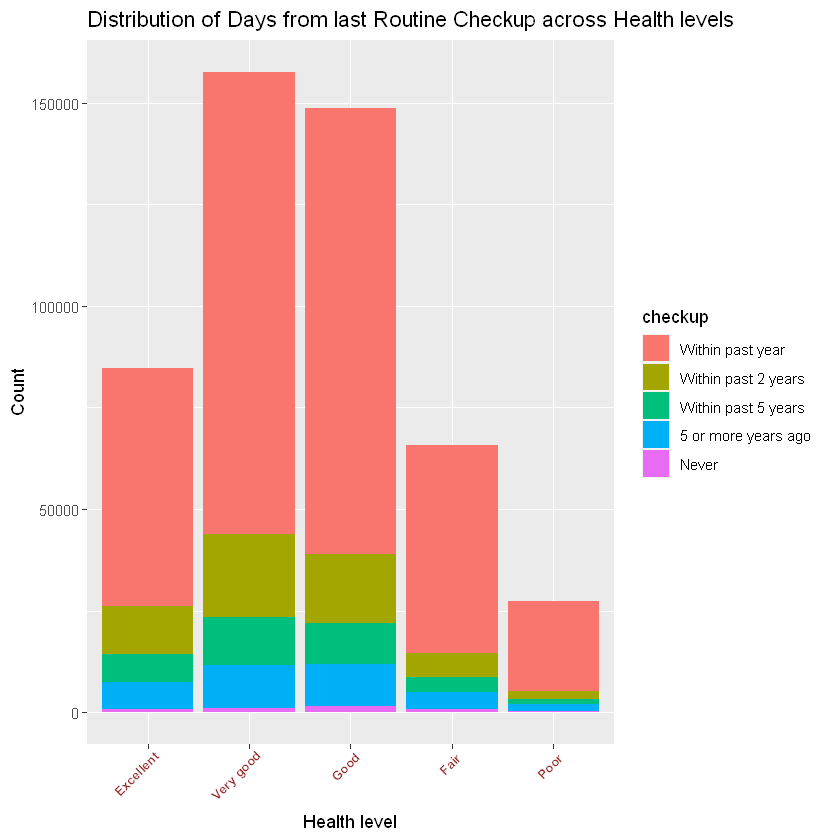

In [89]:
ggplot(rq3_checkup, aes(health, n, fill=checkup))+
 geom_col() +
 labs(x='Health level', y='Count', title='Distribution of Days from last Routine Checkup across Health levels')+
 theme(axis.text.x = element_text(face = "bold", color = "#993333",size=8,angle = 45,vjust = 1, hjust=0.9))

- Looking at this plot we can see the two most common levels of health are "Very Good" and "Good"
- We would need to make a proportion or percentage plot to see any association between the variables.

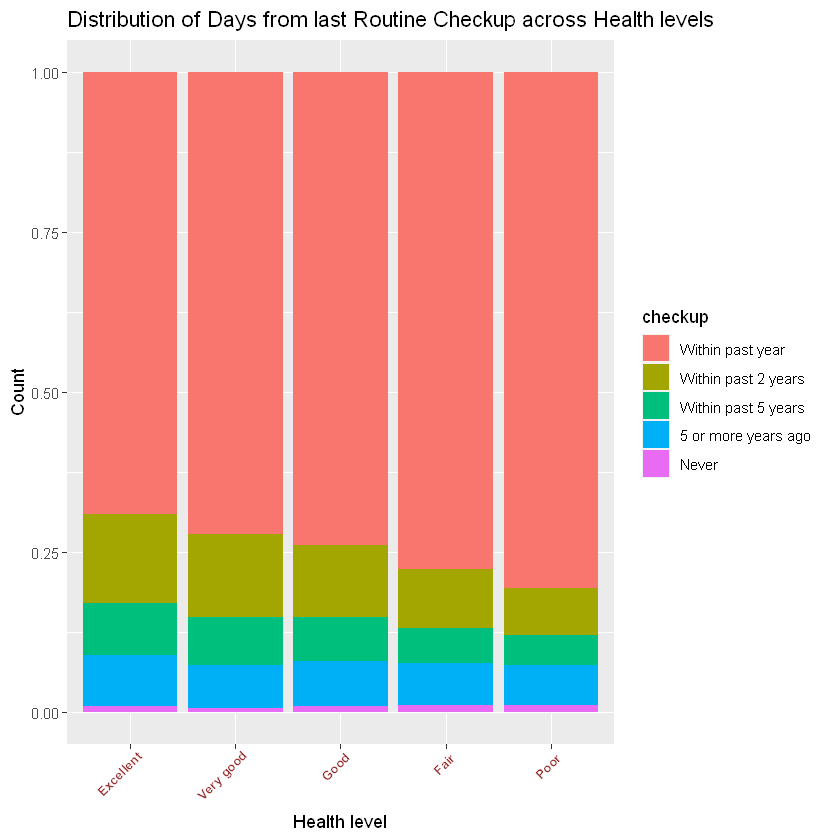

In [88]:
ggplot(rq3_checkup, aes(health, p, fill=checkup))+
 geom_col() +
 labs(x='Health level', y='Count', title='Distribution of Days from last Routine Checkup across Health levels')+
 theme(axis.text.x = element_text(face = "bold", color = "#993333",size=8,angle = 45,vjust = 1, hjust=0.9))

- It is clear that adults with poor general health have had a recent general/routine consultation with the doctor.
- While the proportion is not drastically different across ordinal health levels, does prove a positive correlation across atleast the "Within past year" and "Withing past 2 year" ordinal catergories.